# Project: Predicting Bike Sharing

## Table of Contents
This notebook documents the analysis and model development for the Bike Sharing Dataset. It contains the following steps:
1. Read Dataset
- Descriptive Analysis
- Missing Value Analysis
- Outlier Analysis
- Correlation Analysis
- Visualizing Distribution Of Data
- Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)
- Linear Regression Model
- Random Forest Model

## Set up

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
import pandas as pd  
import numpy as np
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
import random
%matplotlib inline
# Make results reproducible
random.seed(100)

## 1. Read data

In [3]:
bike_rented = pd.read_csv("hourly.csv")
bike_rented.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#checking the number of rows and columns in our datasets.
bike_rented.shape

(17379, 17)

the data contains 17379 rows and 17 columns.

## 2. Descriptive Analysis

In [6]:
bike_rented.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# To see the statistical details of the dataset,
bike_rented.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Plotting a histogram to get an idea of distribution of count of rentals


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

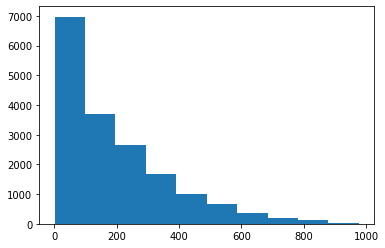

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(bike_rented["cnt"])

In [10]:
bike_rented.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

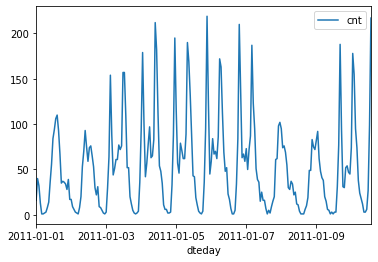

In [11]:
bike_rented[:24*10].plot(x='dteday', y='cnt');

## 3. Missing value analysis

In [12]:
bike_rented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
#Check any NULL values in data:
print(bike_rented.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


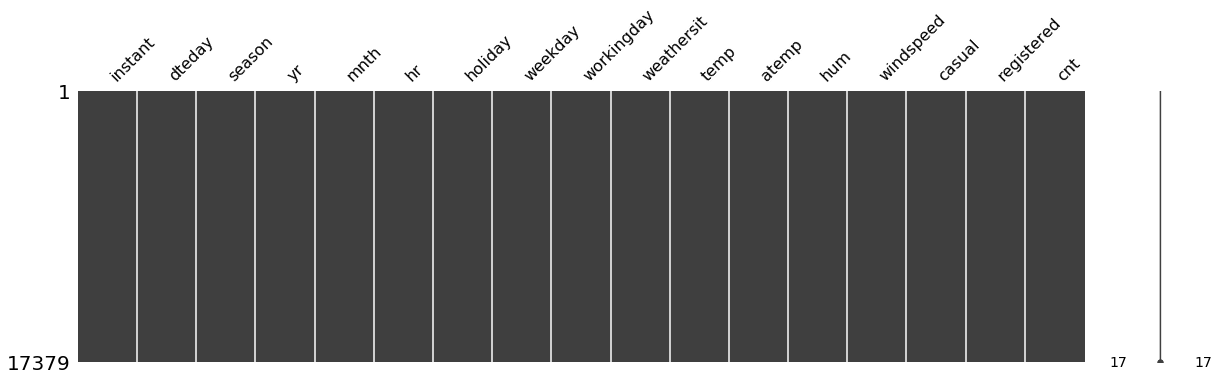

In [14]:
#pip install missingno
import missingno as msno
msno.matrix(bike_rented,figsize=(20,5));

## Dropping instant and dteday

In [15]:
bike_rented = bike_rented.drop(['instant','dteday'],axis=1)
bike_rented.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 4. Outlier Analysis

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

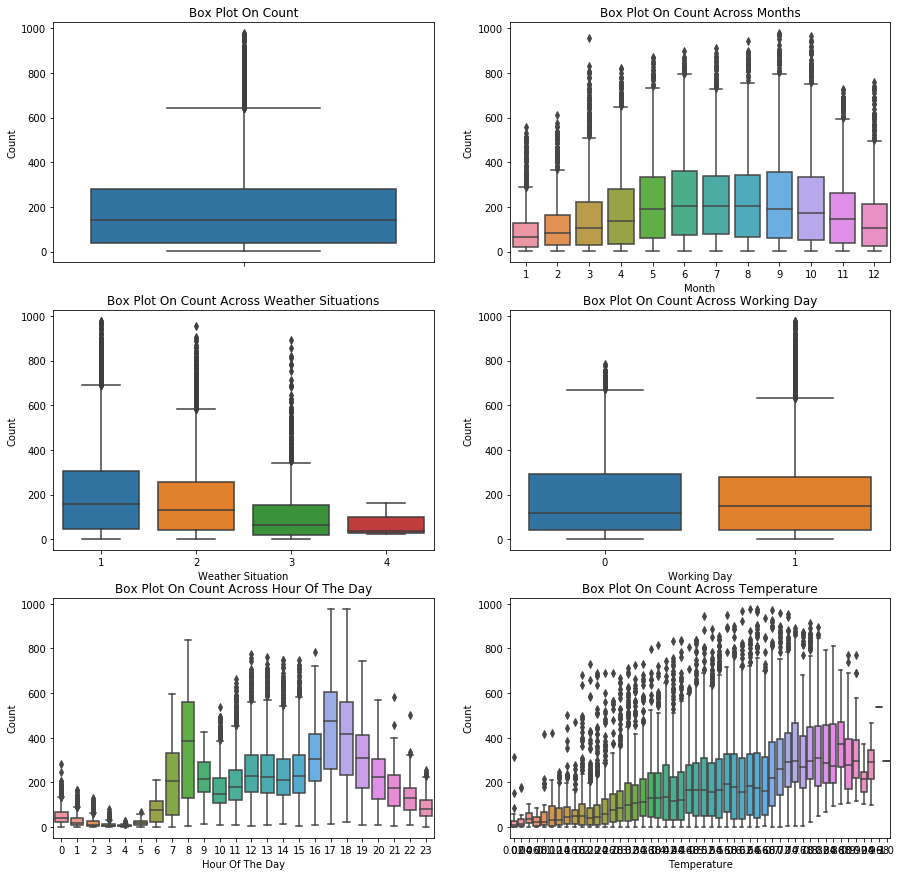

In [16]:
# Box plots
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=bike_rented,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_rented,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=bike_rented,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_rented,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_rented,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_rented,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

### Lets Remove Outliers In The Count Column


In [17]:
dailyDataWithoutOutliers = bike_rented[np.abs(bike_rented["cnt"]-bike_rented["cnt"].mean())<=(3*bike_rented["cnt"].std())]

In [18]:
print ("Shape Of The Before Ouliers: ",bike_rented.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (17379, 15)
Shape Of The After Ouliers:  (17135, 15)


## 5. Correlation Analysis


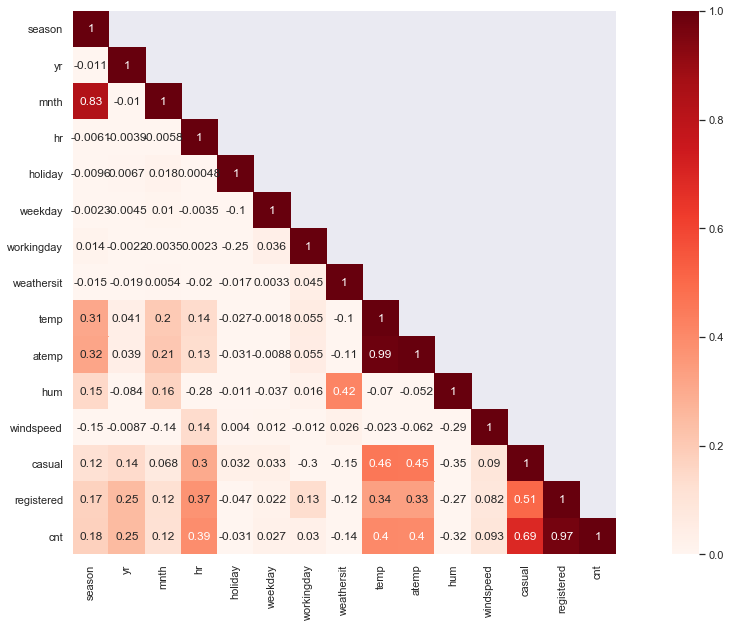

In [63]:
matrix = bike_rented.corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")
plt.show()

Conclusion: At the end of the descriptive analysis chapter, we can note the following points:

- Casual and registered contain direct information about the bike sharing count which is to predict (data leakage). Therefore they are not considered in the feature set.
- The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "atemp" is dismissed.
- The variables "hr" and "temp" seem to be promising features for the bike sharing count prediction.

## 6. Visualizing Distribution Of Data

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

((array([-3.94171042, -3.72363151, -3.60421718, ...,  3.60421718,
          3.72363151,  3.94171042]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.5971457 ,
         6.59850903])),
 (1.3490324630370498, 4.544366339498316, 0.9601811537292402))

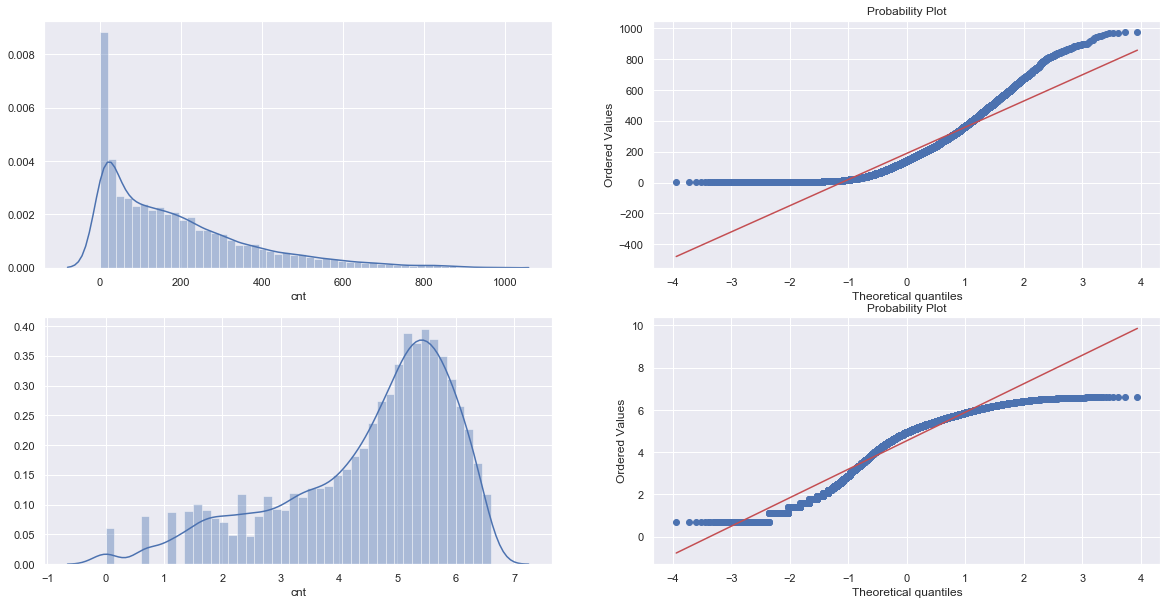

In [25]:
import pylab
import calendar

import seaborn as sn
from scipy import stats

from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 10)
sn.distplot(bike_rented["cnt"],ax=axes[0][0])
stats.probplot(bike_rented["cnt"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["cnt"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["cnt"]), dist='norm', fit=True, plot=axes[1][1])

The distributions show skewness, suggesting log transormation of the count column. 

## 7. Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

- It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
- On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
- Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

In [26]:
bike_rented.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

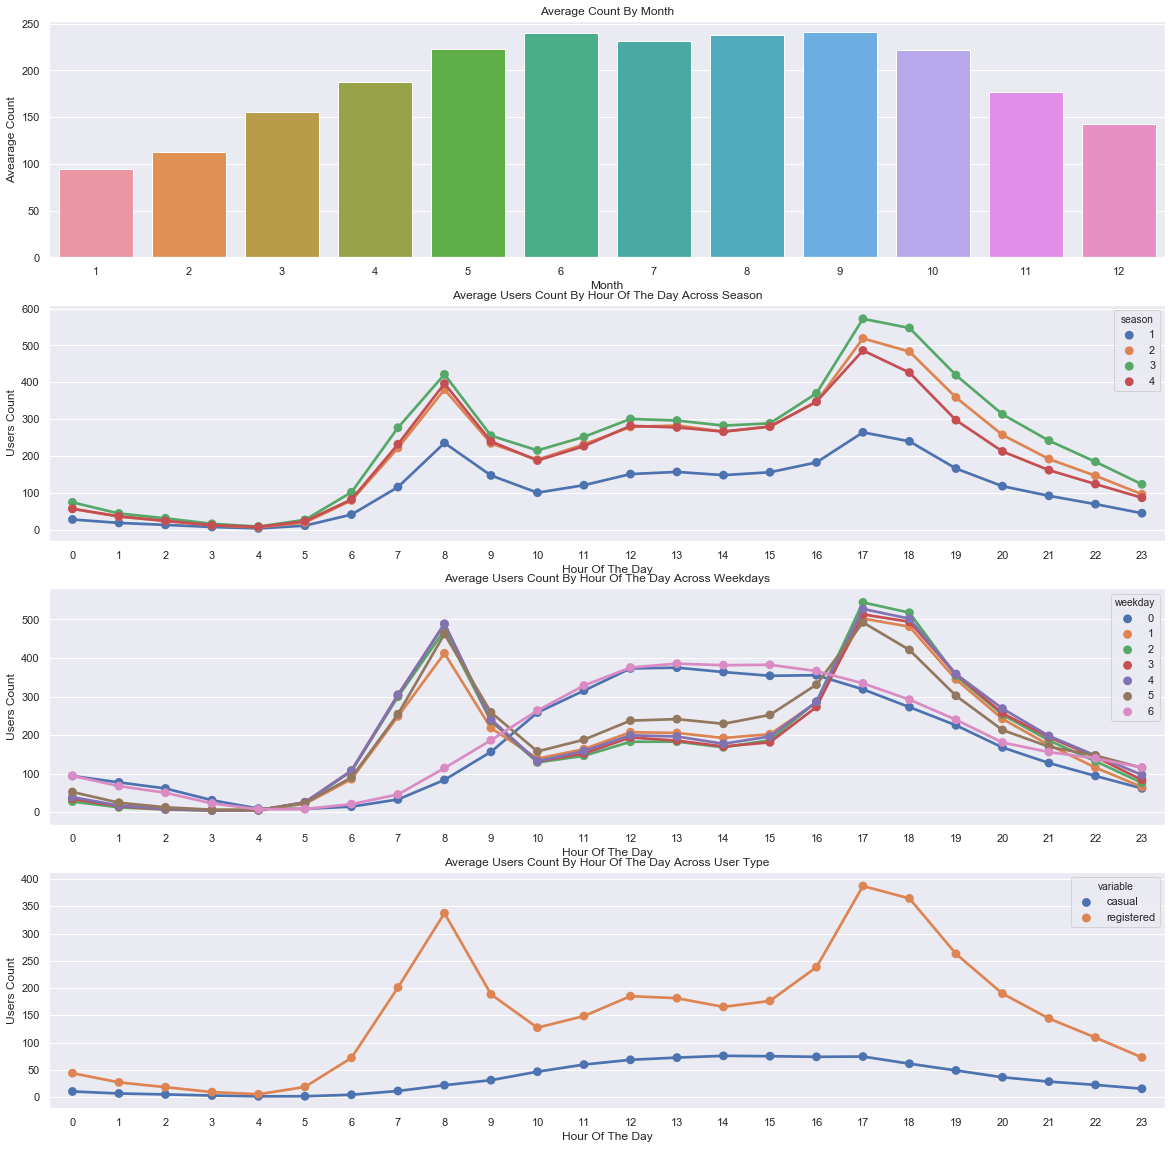

In [29]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(bike_rented.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
sn.barplot(data=monthSorted,x="mnth",y="cnt",ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(bike_rented.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(bike_rented.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(bike_rented[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In the 1st plot, we observe that users are higher in the summer months June - September. In the second plot, it is seen that, Season 3 (July - September) has the higher user count while Season 1 had the least user count (Jan-March). In the third plot, it is seen that during the weekend users peak during afternoon while on weekdays users peak early morning and evening. In the fourth plot, we observe that, registered users are peak during morning and evening hours while casual users peak during afternoon hours.

## 8. Linear Regression Model

We develop a linear regression model to predict the log(count) based on all other features except registered, casual and atemp. 

In [51]:
# Creating train and test dataframes

# Randomizing the dataset

X = np.random.permutation(bike_rented.index)
bike_rented = bike_rented.reindex(X)

A = int(len(bike_rented)*0.75)

train = bike_rented[:A]
test = bike_rented[A:]

train['cnt'] =np.log1p(train['cnt'])
test['cnt'] =np.log1p(test['cnt'])

In [64]:
from sklearn.linear_model import LinearRegression

cols = train.columns.drop(["cnt", "casual", "registered","atemp"])

reg = LinearRegression()

reg.fit(train[cols], train["cnt"])

predictions = reg.predict(test[cols])

print("Root Mean Square Error for Linear Regression", np.mean((predictions - test["cnt"]) ** 2)**0.5)

Root Mean Square Error for Linear Regression 1.0097506934484868


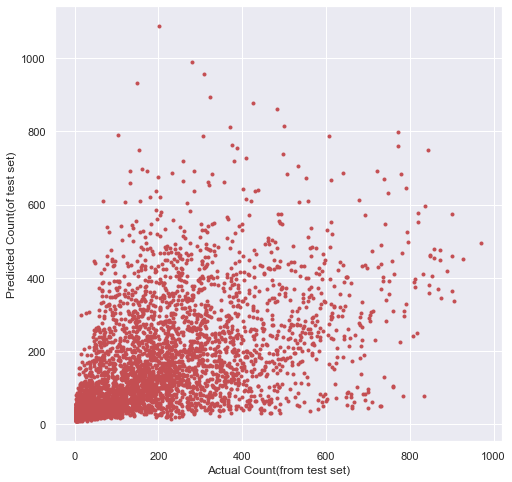

In [65]:
df = pd.DataFrame({'Actual': test['cnt'], 'Predicted': predictions})
plt.figure(figsize = (8,8))
plt.plot(np.exp(df.Actual),np.exp(df.Predicted),'r.')
plt.xlabel('Actual Count(from test set)')
plt.ylabel('Predicted Count(of test set)')
plt.show()

The variance of the predictions is very high as seen in the above plot.

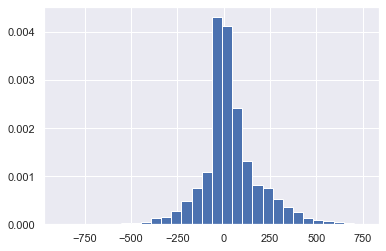

In [66]:
#residual distribution
residual = np.exp(df.Actual) - np.exp(df.Predicted)
residual.hist(bins = 30, density = True)
plt.show()

In [71]:
np.mean(residual)

34.61434139137319

In [74]:
np.sqrt(np.var(residual))

156.61237785761887

The residual(Actual count - Predicted count) distribution plot for the Linear Regression model shows a Gaussian like distribution with mean 34.6 and standard deviation of 156.6. The RMSE of the test set is 1.0097.

## 9. Random Forest

We develop a Random Forest model with 20 estimators to predict the log(count) based on all other features except registered, casual and atemp. 

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfModel = RandomForestRegressor(n_estimators=20) ### Test 0.44
rfModel.fit(X = train[cols],y = train['cnt'])
preds = rfModel.predict(X= test[cols])
print("Root Mean Square Error for Random Forest: ",np.mean((preds - test["cnt"]) ** 2)**0.5)

Root Mean Square Error for Random Forest:  0.3308237880910108


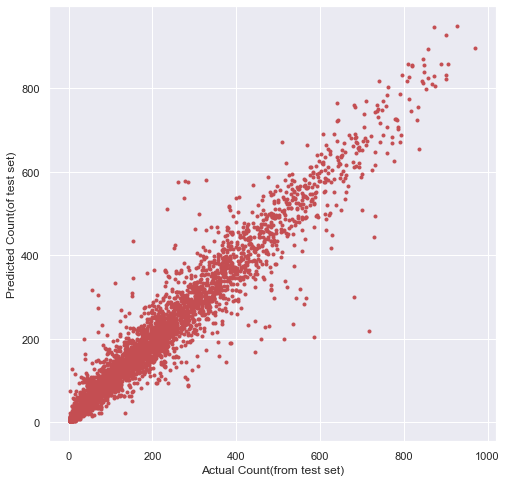

In [68]:
df_RF = pd.DataFrame({'Actual': test['cnt'], 'Predicted': preds})
plt.figure(figsize = (8,8))
plt.plot(np.exp(df_RF.Actual),np.exp(df_RF.Predicted),'r.')
plt.xlabel('Actual Count(from test set)')
plt.ylabel('Predicted Count(of test set)')
plt.show()

The variance of predictions is much lesser than that of linear regression.

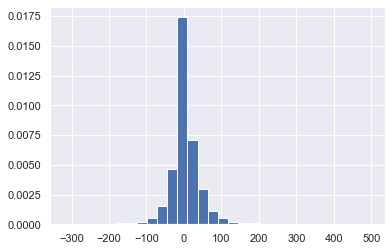

In [69]:
#residual distribution
residual_RF = np.exp(df_RF.Actual) - np.exp(df_RF.Predicted)
residual_RF.hist(bins = 30, density = True)
plt.show()

In [75]:
np.mean(residual_RF)

4.136365004374235

In [76]:
np.sqrt(np.var(residual_RF))

44.38205760653541

The residual(Actual count - Predicted count) distribution plot for the random forest model shows a Gaussian like distribution with mean 4.13 and standard deviation of 44.38 on the test set. The RMSE of the test set is 0.33. The test RMSE of random forest is 67% lower than linear regression. Clearly, random forest is a bteer model for this application. 

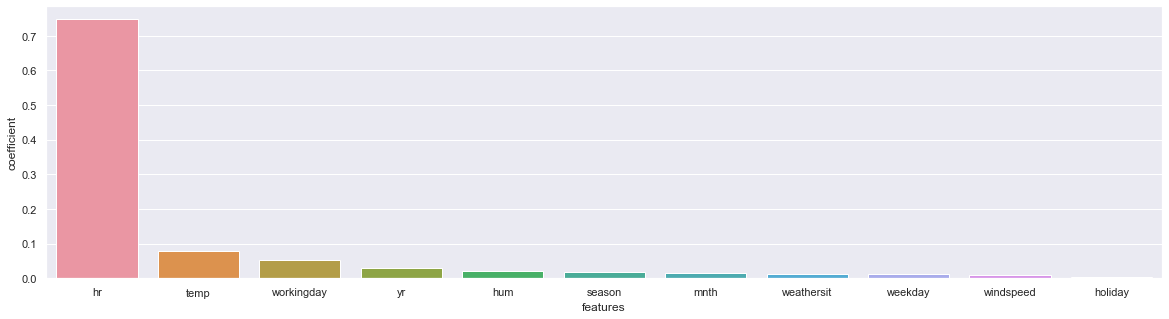

In [70]:
features = pd.DataFrame()
features['features'] = train[cols].columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax)
plt.show()

The feature importance plot shown above shows that 'hr', 'temp','working day' are the 3 most important to predict count.